In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
zeo_df = pd.read_csv("data/zeolite/zeolite_data.csv")
al_df = pd.read_csv("data/aluminum/al_data.csv")

In [3]:
zeo_df.sample(5)

,doi,doi + link,From?,article_type,journal,publisher,Si,Si_location,Ge,Ge_location,...,B,B_location,Time,Time_location,Temp,Temp_location,SDA Type,SDA Type_location,Extracted,Extracted_location
77,10.1016/j.micromeso.2012.10.004,10.1016/j.micromeso.2012.10.004,Table,journal_article,Microporous and Mesoporous Materials,Elsevier BV,1,Table Column,0.20,Table Column,...,0.2,Table Column,168,Table Column,170.00,Table Caption,"6-azoniaspiro-[5,5]-undecane hydroxide",Page Text,Amorphous+GeO2+chabazite,Table Column
43,10.1007/s10853-016-9799-5,10.1007/s10853-016-9799-5,Table,journal_article,Journal of Materials Science,Springer Science and Business Media LLC,1,Table Column,1.25,Table Column,...,0.0,Not Present,168,Footnote,170.00,Footnote,TMHDA,Table Header,Amorphous,Table Column
207,10.1016/s1387-1811(02)00612-1,10.1016/s1387-1811(02)00612-1,Table,journal_article,Microporous and Mesoporous Materials,Elsevier BV,1,Table Column,0.01,Table Column,...,0.0,Not Present,24,Page Text,184.85,Page Text,TPAOH,Footnote,ZSM-5,Page Text
39,10.1002/chem.201602419,10.1002/chem.201602419,Table,journal_article,Chemistry – A European Journal,Wiley,1,Table Column,0.50,Table Column,...,0.0,Not Present,360,Page Text,149.85,Page Text,1?Methyl?3?(2??methylbenzyl)imidazolium chloride,Page Text,NUD-2,Table Header
114,10.1016/j.micromeso.2012.06.036,10.1016/j.micromeso.2012.06.036,Table,journal_article,Microporous and Mesoporous Materials,Elsevier BV,1,Table Caption,1.00,Table Caption,...,0.0,Not Present,6,Table Header,150.00,Table Header,"3?,4?-dihydro-1?H-spiro[isoindoline-2,2?-isoqu...",Page Text,Amorphous,Table Cell


In [4]:
al_df.sample(5)

,doi,doi + link,pdf?,Ref,double-checked,name,AA,AA_location,temper,temper_location,...,Pfeiffer_no,series,who added,Notes,article_type,journal,publisher,included_in_dataset,pdf,xml
211,10.1016/j.msea.2015.07.059,10.1016/j.msea.2015.07.059,Y,Wang2015,True,A,NaN,NaN,T4P,NaN,...,908,6000,NaN,NaN,journal_article,Materials Science and Engineering: A,Elsevier BV,True,False,False
36,10.1016/j.jmatprotec.2007.08.070,10.1016/j.jmatprotec.2007.08.070,Y,KoteswaraRao2008,True,Base metal (2219-T87),2219,NaN,T87,NaN,...,127,2000,NaN,NaN,journal_article,Journal of Materials Processing Technology,Elsevier BV,True,False,False
159,10.1016/j.jallcom.2017.04.084,10.1016/j.jallcom.2017.04.084,Y,Jung2017,True,w/o UST @ 25C,NaN,NaN,T7,NaN,...,574,4000,NaN,NaN,journal_article,Journal of Alloys and Compounds,Elsevier BV,True,False,False
258,10.1016/j.msea.2004.02.052,10.1016/j.msea.2004.02.052,Y,Oliveria2004,True,AA7050-RRA20 + T6,7050,NaN,RRA20+T6,NaN,...,1043,7000,NaN,NaN,journal_article,Materials Science and Engineering: A,Elsevier BV,True,False,False
147,10.1016/j.msea.2011.01.041,10.1016/j.msea.2011.01.041,Y,Fang2011,True,T6 (solution treatment at 540degC for 90min+ag...,NaN,NaN,T6,NaN,...,508,4000,NaN,NaN,journal_article,Materials Science and Engineering: A,Elsevier BV,True,False,False


## Compute statistics for Zeolite Locations

In [5]:
zeo_location_columns = [column for column in zeo_df.columns if column.endswith("_location")]
print(len(zeo_location_columns))
zeo_location_columns

12


['Si_location',
 'Ge_location',
 'Al_location',
 'OH_location',
 'H2O_location',
 'HF_location',
 'SDA_location',
 'B_location',
 'Time_location',
 'Temp_location',
 'SDA Type_location',
 'Extracted_location']

In [6]:
print("\n".join([col.replace("_location", "") for col in zeo_location_columns]))

Si
Ge
Al
OH
H2O
HF
SDA
B
Time
Temp
SDA Type
Extracted


In [7]:
zeo_location_counts = zeo_df[zeo_location_columns].apply(pd.Series.value_counts).fillna(0).sort_values(by=["Extracted_location", "Si_location"], ascending=True)
zeo_location_counts = zeo_location_counts.rename(columns=lambda x: x.replace("_location", ""))/len(zeo_df)
zeo_location_counts

,Si,Ge,Al,OH,H2O,HF,SDA,B,Time,Temp,SDA Type,Extracted
Footnote,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.122222,0.122222,0.029630,0.000000
Not Present,0.074074,0.003704,0.785185,0.188889,0.111111,0.237037,0.066667,0.914815,0.000000,0.000000,0.066667,0.000000
Table Caption,0.133333,0.211111,0.000000,0.133333,0.000000,0.133333,0.133333,0.000000,0.000000,0.196296,0.059259,0.000000
Table Header,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.133333,0.133333,0.122222,0.040741
Table Cell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333
Page Text,0.151852,0.203704,0.085185,0.233333,0.244444,0.166667,0.314815,0.011111,0.388889,0.522222,0.722222,0.233333
Table Column,0.640741,0.581481,0.129630,0.444444,0.437037,0.462963,0.485185,0.074074,0.355556,0.025926,0.000000,0.588889


In [8]:
tab20 = matplotlib.colormaps["tab20c"]
colors = tab20.colors

location_color_map = {
    'Table Column': colors[8],
    'Table Cell': colors[9],
    'Table Header': colors[11],

    'Table Caption': colors[0],
    'Footnote': colors[1],
    'Page Text': colors[2],
    'Not Present': "grey",
}

In [9]:

zeo_location_counts

,Si,Ge,Al,OH,H2O,HF,SDA,B,Time,Temp,SDA Type,Extracted
Footnote,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.122222,0.122222,0.029630,0.000000
Not Present,0.074074,0.003704,0.785185,0.188889,0.111111,0.237037,0.066667,0.914815,0.000000,0.000000,0.066667,0.000000
Table Caption,0.133333,0.211111,0.000000,0.133333,0.000000,0.133333,0.133333,0.000000,0.000000,0.196296,0.059259,0.000000
Table Header,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.133333,0.133333,0.122222,0.040741
Table Cell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333
Page Text,0.151852,0.203704,0.085185,0.233333,0.244444,0.166667,0.314815,0.011111,0.388889,0.522222,0.722222,0.233333
Table Column,0.640741,0.581481,0.129630,0.444444,0.437037,0.462963,0.485185,0.074074,0.355556,0.025926,0.000000,0.588889


## Compute stats for Al Locations

In [10]:
al_location_columns = [column for column in al_df.columns if column.endswith("_location")]
print(len(zeo_location_columns))
al_location_columns

12


['AA_location',
 'temper_location',
 'YS [MPa]_location',
 'UTS  [Mpa]_location',
 'elong [%]_location',
 'Hardness_location',
 'Hardness UNIT_location',
 'Has comp [True / False / nominal]_location',
 'Cu_location',
 'Mn_location',
 'Si_location',
 'Mg_location',
 'Zn_location',
 'Cr_location',
 'Fe_location',
 'Ti_location',
 'Zr_location',
 'Ag_location',
 'Be_location',
 'Bi_location',
 'C_location',
 'Ca_location',
 'Ce_location',
 'Er_location',
 'Ga_location',
 'Ge_location',
 'Hf_location',
 'La_location',
 'Li_location',
 'Ni_location',
 'P_location',
 'Pb_location',
 'Sc_location',
 'Sn_location',
 'Sr_location',
 'V_location',
 'Yb_location']

In [11]:
non_element_locations = [
    'AA_location',
     'temper_location',
     'YS [MPa]_location',
     'UTS  [Mpa]_location',
     'elong [%]_location',
     'Hardness_location',
     'Hardness UNIT_location',
     'Has comp [True / False / nominal]_location'
]

element_locations = [
    'Cu_location',
     'Mn_location',
     'Si_location',
     'Mg_location',
     'Zn_location',
     'Cr_location',
     'Fe_location',
     'Ti_location',
     'Zr_location',
     'Ag_location',
     'Be_location',
     'Bi_location',
     'C_location',
     'Ca_location',
     'Ce_location',
     'Er_location',
     'Ga_location',
     'Ge_location',
     'Hf_location',
     'La_location',
     'Li_location',
     'Ni_location',
     'P_location',
     'Pb_location',
     'Sc_location',
     'Sn_location',
     'Sr_location',
     'V_location',
     'Yb_location'
]

In [12]:
al_location_counts = al_df.iloc[:27][non_element_locations].fillna("Not Present").apply(lambda x: x.str.split(",").str[0]).apply(pd.Series.value_counts).fillna(
    0)
al_location_counts = al_location_counts.rename(
    columns=lambda x: x.replace("_location", "")) / 27
al_location_counts = al_location_counts.rename(columns={"Has comp [True / False / nominal]": "Has Comp"})

element_location_counts = al_df.iloc[:27][element_locations].fillna("Not Present").apply(lambda x: x.str.split(",").str[0]).apply(pd.Series.value_counts).fillna(0).sum(axis=1).rename("Element") / (27 * len(element_locations))

al_location_counts = al_location_counts.join(element_location_counts).fillna(0)
al_location_counts

,AA,temper,YS [MPa],UTS [Mpa],elong [%],Hardness,Hardness UNIT,Has Comp,Element
Not Present,0.37037,0.037037,0.111111,0.0,0.037037,0.851852,0.851852,0.148148,0.818646
Page Text,0.62963,0.962963,0.000000,0.0,0.000000,0.074074,0.074074,0.185185,0.035760
Table Column,0.00000,0.000000,0.888889,1.0,0.962963,0.074074,0.037037,0.666667,0.145594
Table Header,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.037037,0.000000,0.000000


## Plot stats

/var/folders/s6/ky9bs73s61s_hmchh70d7kqh0000gn/T/ipykernel_37409/436806533.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(list(reversed(zeo_location_counts.columns)))
/var/folders/s6/ky9bs73s61s_hmchh70d7kqh0000gn/T/ipykernel_37409/436806533.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(list(reversed(al_location_counts.columns)))


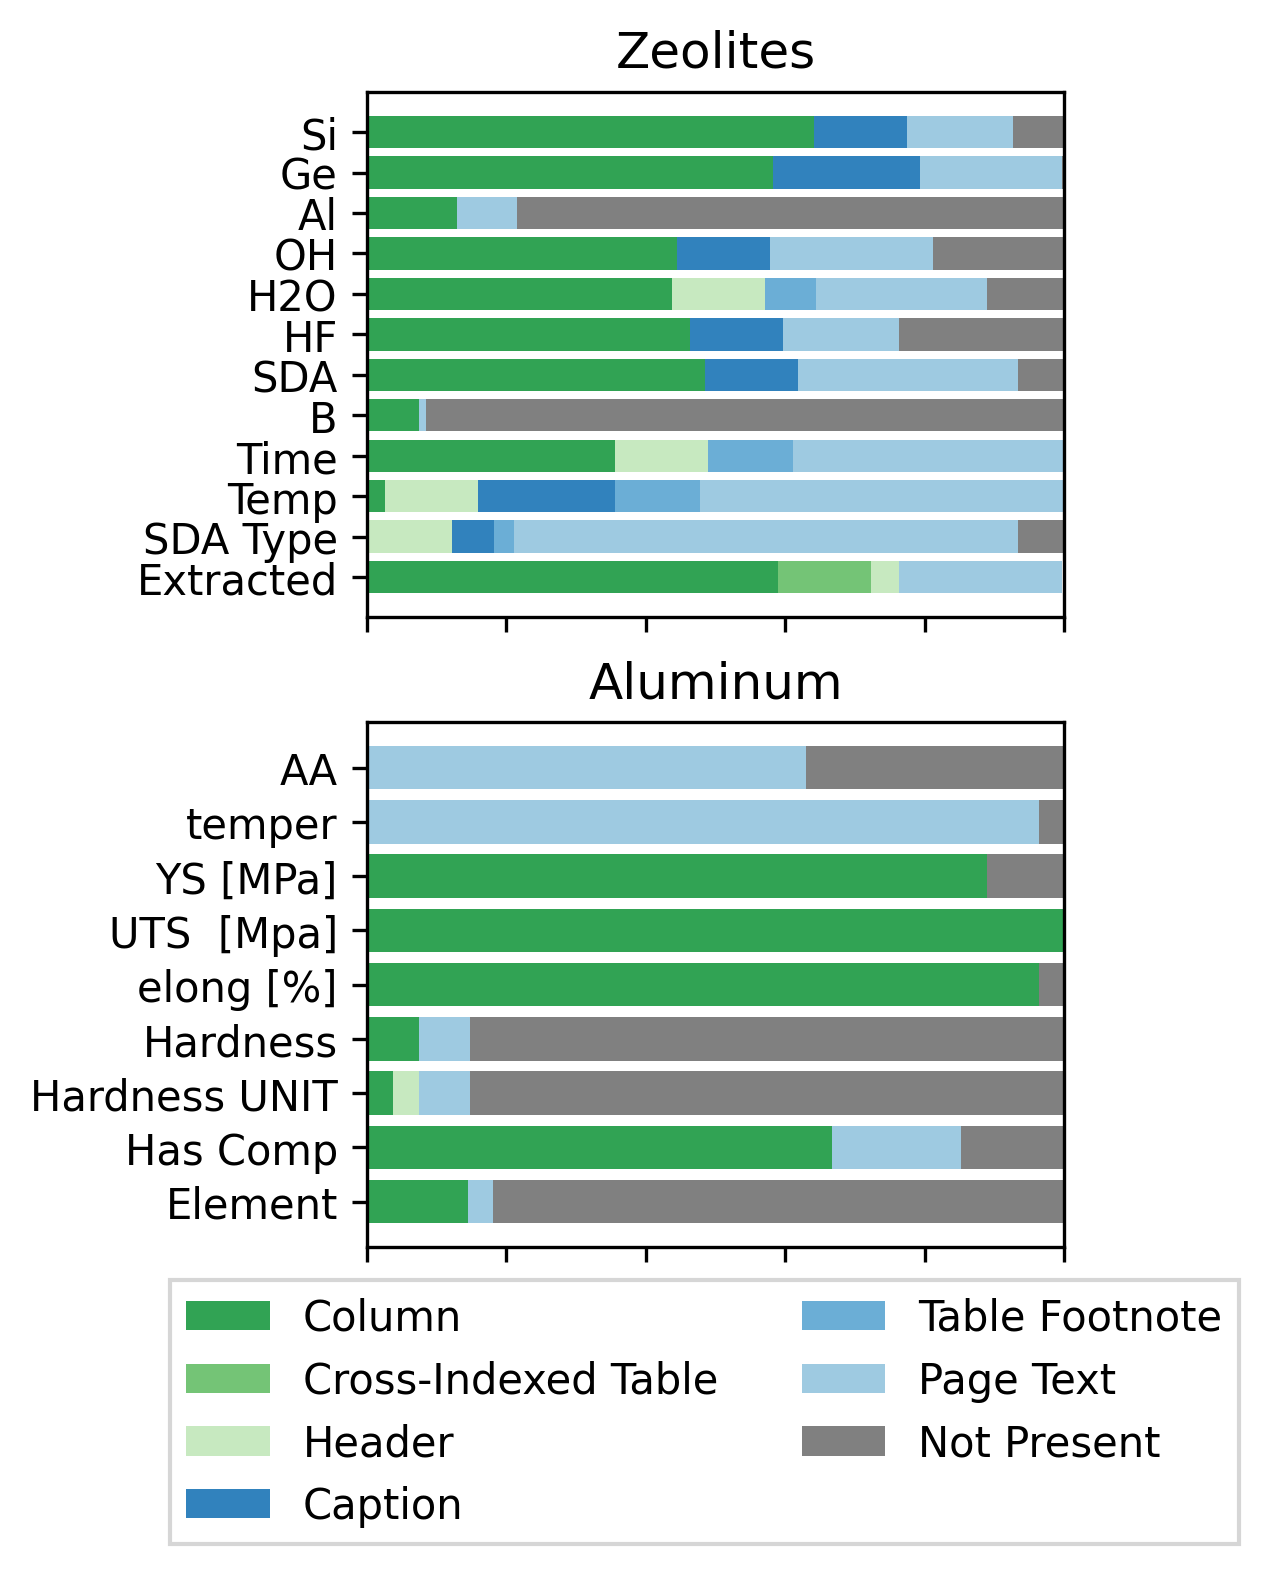

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 5), dpi=300, sharex=True)

plt.rcParams.update({"font.size": 10})

display_names = {
    "Table Column": "Column",
    "Table Header": "Header",
    "Table Cell": "Cross-Indexed Table",
    "Table Caption": "Caption",
    "Footnote": "Table Footnote"
}


for i, column_name in enumerate(reversed(zeo_location_counts.columns)):
    column = zeo_location_counts[column_name]
    bottom = 0
    for location, color in location_color_map.items():
        value = column[location]
        # ax1.bar(column_name.replace("_location", ""), value, color=color, label=(display_names.get(location, location) if i == 0 else None), bottom=bottom)
        ax1.barh(column_name.replace("_location",""), value, color=color, label=display_names.get(location, location) if i == 0 else None, left=bottom)
        bottom += value


ax1.set_yticklabels(list(reversed(zeo_location_counts.columns)))
ax1.set_xticklabels([])
fig.legend(loc="center", bbox_to_anchor=(0.5, 0), fancybox=False, shadow=False, ncols=2)
ax1.set_title("Zeolites")


for i, column_name in enumerate(reversed(al_location_counts.columns)):
    column = al_location_counts[column_name]
    bottom = 0
    for location, color in location_color_map.items():
        if location not in column:
            continue
        value = column[location]
        # ax1.bar(column_name.replace("_location", ""), value, color=color, label=(display_names.get(location, location) if i == 0 else None), bottom=bottom)
        ax2.barh(column_name.replace("_location",""), value, color=color, label=display_names.get(location, location) if i == 0 else None, left=bottom)
        bottom += value


ax2.set_yticklabels(list(reversed(al_location_counts.columns)))
ax2.set_xticklabels([])
ax2.set_title("Aluminum")


plt.savefig("images/location_distribution.png", bbox_inches='tight')

In [14]:
al_location_counts.columns

Index(['AA', 'temper', 'YS [MPa]', 'UTS  [Mpa]', 'elong [%]', 'Hardness',
       'Hardness UNIT', 'Has Comp', 'Element'],
      dtype='object')